In [14]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

netflix = pd.read_csv(
    filepath_or_buffer='data/netflix.csv',
    # parse_dates=['date_added'],
)
netflix["date_added"] = pd.to_datetime(netflix["date_added"], errors='coerce')
netflix["type"] = netflix["type"].astype("category")
pd.DataFrame.info(netflix)
netflix.nunique()
netflix.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       5837 non-null   object        
 1   director    3936 non-null   object        
 2   date_added  5195 non-null   datetime64[ns]
 3   type        5837 non-null   category      
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 142.8+ KB


/var/folders/sz/s8v8syt15ylbz3_m6fvf55sc0000gn/T/ipykernel_92263/1259600745.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix["date_added"] = pd.to_datetime(netflix["date_added"], errors='coerce')


,title,director,date_added,type
0,Alias Grace,NaN,2017-11-03,TV Show
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
2,Lunatics,NaN,2019-04-19,TV Show
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie


In [7]:
netflix.nunique()

title         5780
director      3024
date_added    1092
type             2
dtype: int64

<Axes: ylabel='count'>

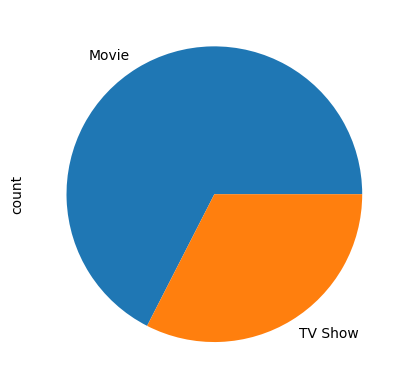

In [15]:
### соотношение сериалов и фильмов
netflix['type'].value_counts().plot(kind='pie')

In [9]:
directors = netflix.groupby("director")
result = directors["title"].agg(
    Total_Title='count',
).sort_values(by="Total_Title", ascending=False)
print(result)

                      Total_Title
director                         
Raúl Campos                    18
Jay Karas                      14
Marcus Raboy                   14
Jay Chapman                    12
Martin Scorsese                 8
...                           ...
John Papola                     1
John Patrick Shanley            1
John R. Leonetti                1
John Ridley                     1
Marco Bonfanti                  1

[3024 rows x 1 columns]
